# Comparaison entrer les projections de SimGen et de certaines données exsistantes

## Effectuer une simulation avec Simgen


In [1]:
import sys
import warnings
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

Pour le moment, il faut changer les chemins pour les répertoires

In [2]:
sys.path.append('/Users/juliennavaux/Dropbox (CEDIA)/OLG_CAN/demo/simgen/')
path_data = '/Users/juliennavaux/Dropbox (CEDIA)/OLG_CAN/demo/Benchmark/'

In [3]:
from simgen import model

On simule la population jusqu'en 2040

In [4]:
base = model(start_yr=2017,stop_yr=2061)
base.startpop('startpopchsld')
base.immig_assumptions(init='newimmpopchsld')
base.birth_assumptions(scenario='reference')
base.dead_assumptions(scenario='low')
base.reset()

In [5]:
base.simulate(25)

In [6]:
base.stats.save('simpop2061.pkl')

# Analyse des résultats (pour le minisite)

# Figure 1

In [7]:
pop_isq = pd.read_csv(path_data+'isq_pop_age_1996_2041.csv', sep=';')
pop_isq = pop_isq.set_index('year')

In [8]:
pop =base.stats.freq()
pop_m=base.stats.freq(sub='male==True')
pop_f=base.stats.freq(sub='male==False')

In [9]:
pop_isq_total=pop_isq.loc[pop_isq['sex']=='all']
pop_isq_total =pop_isq_total['total']
pop_isq_total_m = pop_isq.loc[pop_isq['sex']=='male']
pop_isq_total_m =pop_isq_total_m['total']
pop_isq_total_f = pop_isq.loc[pop_isq['sex']=='female']
pop_isq_total_f =pop_isq_total_f['total']

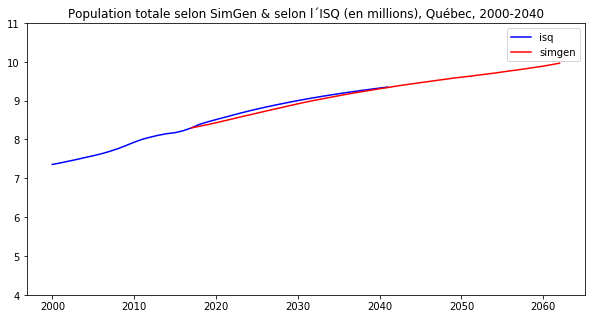

In [100]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_total[pop_isq_total.index>=2000]/1e6, label='isq', color='blue')
plt.plot(pop/1e6, label='simgen', color='red')
plt.legend()
plt.title('Population totale selon SimGen & selon l´ISQ (en millions), Québec, 2000-2040')
plt.ylim(4, 11)
plt.show()

# Figure 3

In [11]:
pop_024=base.stats.freq(sub='age<25')
pop_2564=base.stats.freq(sub='age>24 and age<65')
pop_65p=base.stats.freq(sub='age>64')

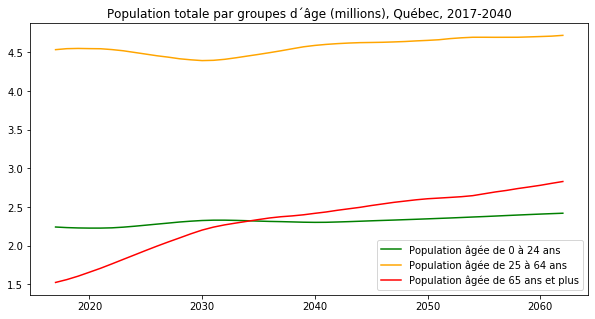

In [12]:
plt.figure(figsize=(10,5))
plt.plot(pop_024/1e6, label='Population âgée de 0 à 24 ans', color='green')
plt.plot(pop_2564/1e6, label='Population âgée de 25 à 64 ans', color='orange')
plt.plot(pop_65p/1e6, label='Population âgée de 65 ans et plus', color='red')
plt.legend()
plt.title('Population totale par groupes d´âge (millions), Québec, 2017-2040')
#plt.ylim(0, 10)
plt.show()

Text(0.5, 1.0, 'Proportion de la population par groupes d´âge, Québec, 2017-2040')

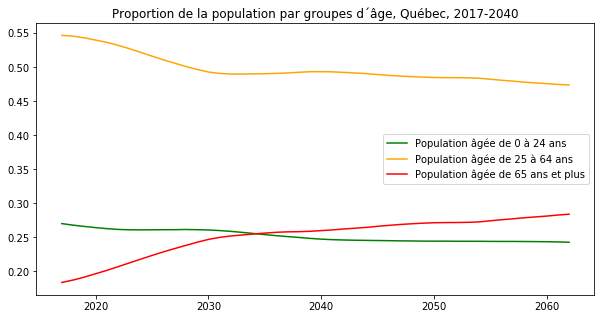

In [13]:
tot = pop_024+pop_2564+pop_65p
plt.figure(figsize=(10,5))
plt.plot(pop_024/tot, label='Population âgée de 0 à 24 ans', color='green')
plt.plot(pop_2564/tot, label='Population âgée de 25 à 64 ans', color='orange')
plt.plot(pop_65p/tot, label='Population âgée de 65 ans et plus', color='red')
plt.legend()
plt.title('Proportion de la population par groupes d´âge, Québec, 2017-2040')
#plt.ylim(0, 10)

In [14]:
pop_024/tot

2017    0.270080
2018    0.267816
2019    0.265907
2020    0.264207
2021    0.262655
2022    0.261543
2023    0.260992
2024    0.260932
2025    0.260998
2026    0.261133
2027    0.261176
2028    0.261424
2029    0.261154
2030    0.260748
2031    0.259892
2032    0.258688
2033    0.257210
2034    0.255601
2035    0.253977
2036    0.252419
2037    0.251103
2038    0.249803
2039    0.248430
2040    0.247304
2041    0.246555
2042    0.246038
2043    0.245696
2044    0.245485
2045    0.245260
2046    0.245061
2047    0.244788
2048    0.244633
2049    0.244411
2050    0.244331
2051    0.244348
2052    0.244187
2053    0.244166
2054    0.244150
2055    0.244005
2056    0.243927
2057    0.243937
2058    0.243833
2059    0.243696
2060    0.243515
2061    0.243203
2062    0.242780
dtype: float64

In [15]:
pop_2564/tot

2017    0.546120
2018    0.544890
2019    0.542473
2020    0.539199
2021    0.535830
2022    0.531496
2023    0.526534
2024    0.521119
2025    0.515652
2026    0.510301
2027    0.505396
2028    0.500454
2029    0.496102
2030    0.492360
2031    0.490238
2032    0.489377
2033    0.489372
2034    0.489628
2035    0.489892
2036    0.490270
2037    0.490917
2038    0.491966
2039    0.492796
2040    0.492870
2041    0.492626
2042    0.491804
2043    0.490973
2044    0.490002
2045    0.488639
2046    0.487467
2047    0.486418
2048    0.485590
2049    0.484911
2050    0.484318
2051    0.484046
2052    0.484115
2053    0.483898
2054    0.483293
2055    0.481819
2056    0.480294
2057    0.479005
2058    0.477529
2059    0.476465
2060    0.475389
2061    0.474177
2062    0.473323
dtype: float64

In [16]:
pop_65p/tot

2017    0.183800
2018    0.187294
2019    0.191620
2020    0.196595
2021    0.201515
2022    0.206961
2023    0.212474
2024    0.217949
2025    0.223350
2026    0.228566
2027    0.233428
2028    0.238122
2029    0.242744
2030    0.246892
2031    0.249870
2032    0.251935
2033    0.253418
2034    0.254771
2035    0.256131
2036    0.257310
2037    0.257979
2038    0.258230
2039    0.258773
2040    0.259825
2041    0.260819
2042    0.262158
2043    0.263331
2044    0.264513
2045    0.266101
2046    0.267472
2047    0.268794
2048    0.269778
2049    0.270677
2050    0.271351
2051    0.271607
2052    0.271699
2053    0.271936
2054    0.272557
2055    0.274176
2056    0.275778
2057    0.277058
2058    0.278638
2059    0.279839
2060    0.281097
2061    0.282620
2062    0.283897
dtype: float64

In [17]:
pop_65p/pop_2564

2017    0.336555
2018    0.343728
2019    0.353234
2020    0.364606
2021    0.376080
2022    0.389393
2023    0.403533
2024    0.418234
2025    0.433142
2026    0.447903
2027    0.461872
2028    0.475812
2029    0.489302
2030    0.501447
2031    0.509692
2032    0.514809
2033    0.517844
2034    0.520336
2035    0.522831
2036    0.524834
2037    0.525505
2038    0.524895
2039    0.525112
2040    0.527167
2041    0.529447
2042    0.533054
2043    0.536344
2044    0.539821
2045    0.544575
2046    0.548698
2047    0.552599
2048    0.555568
2049    0.558200
2050    0.560274
2051    0.561118
2052    0.561228
2053    0.561970
2054    0.563957
2055    0.569043
2056    0.574186
2057    0.578404
2058    0.583500
2059    0.587323
2060    0.591299
2061    0.596022
2062    0.599795
dtype: float64

## Figure 2

In [18]:
none = base.stats.freq('educ', sub="educ=='none'and age>=25 and age<=64 and insch==False")
des = base.stats.freq('educ', sub="educ=='des'and age>=25 and age<=64 and insch==False")
dec = base.stats.freq('educ', sub="educ=='dec'and age>=25 and age<=64 and insch==False")
uni = base.stats.freq('educ', sub="educ=='uni'and age>=25 and age<=64 and insch==False")

In [19]:
tot = uni.loc[:,'uni']+ dec.loc[:,'dec'] + des.loc[:,'des'] + none.loc[:,'none']

Text(0.5, 1.0, 'Part de la population de 25 à 64 ans par niveau d´éducation, Québec, 2017-2040')

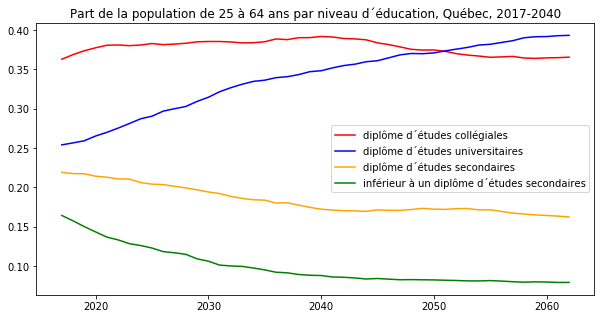

In [20]:
plt.figure(figsize=(10,5))
plt.plot(dec.loc[:,'dec']/tot, label='diplôme d´études collégiales', color='red')
plt.plot(uni.loc[:,'uni']/tot, label='diplôme d´études universitaires', color='blue')
plt.plot(des.loc[:,'des']/tot, label='diplôme d´études secondaires', color='orange')
plt.plot(none.loc[:,'none']/tot, label='inférieur à un diplôme d´études secondaires', color='green')
plt.legend()
plt.title('Part de la population de 25 à 64 ans par niveau d´éducation, Québec, 2017-2040')

In [21]:
uni.loc[:,'uni']/tot

2017    0.253968
2018    0.256456
2019    0.259213
2020    0.265237
2021    0.269883
2022    0.275309
2023    0.281156
2024    0.287139
2025    0.290421
2026    0.296909
2027    0.299914
2028    0.302805
2029    0.309241
2030    0.314504
2031    0.321562
2032    0.326724
2033    0.331088
2034    0.334722
2035    0.336241
2036    0.339449
2037    0.340674
2038    0.343309
2039    0.347039
2040    0.348261
2041    0.351817
2042    0.354826
2043    0.356585
2044    0.359717
2045    0.360994
2046    0.364660
2047    0.368411
2048    0.370213
2049    0.369925
2050    0.370906
2051    0.373485
2052    0.375755
2053    0.377932
2054    0.380926
2055    0.381892
2056    0.384200
2057    0.386450
2058    0.390197
2059    0.391517
2060    0.391718
2061    0.392816
2062    0.393269
dtype: float64

In [22]:
dec.loc[:,'dec']/tot

2017    0.362869
2018    0.368812
2019    0.373720
2020    0.377459
2021    0.380685
2022    0.381023
2023    0.380166
2024    0.380974
2025    0.382857
2026    0.381492
2027    0.382146
2028    0.383220
2029    0.385019
2030    0.385468
2031    0.385444
2032    0.384902
2033    0.383671
2034    0.383884
2035    0.385133
2036    0.388702
2037    0.387847
2038    0.390261
2039    0.390385
2040    0.391840
2041    0.391237
2042    0.389293
2043    0.388761
2044    0.387583
2045    0.383765
2046    0.381538
2047    0.378576
2048    0.375534
2049    0.374554
2050    0.374748
2051    0.372898
2052    0.369989
2053    0.368172
2054    0.366945
2055    0.365390
2056    0.365871
2057    0.366483
2058    0.364496
2059    0.363942
2060    0.364650
2061    0.364893
2062    0.365503
dtype: float64

In [23]:
(des.loc[:,'des']+none.loc[:,'none'])/tot

2017    0.383163
2018    0.374731
2019    0.367068
2020    0.357304
2021    0.349432
2022    0.343668
2023    0.338678
2024    0.331887
2025    0.326722
2026    0.321600
2027    0.317940
2028    0.313975
2029    0.305740
2030    0.300028
2031    0.292994
2032    0.288374
2033    0.285241
2034    0.281393
2035    0.278626
2036    0.271849
2037    0.271479
2038    0.266430
2039    0.262576
2040    0.259899
2041    0.256946
2042    0.255881
2043    0.254654
2044    0.252701
2045    0.255241
2046    0.253803
2047    0.253013
2048    0.254253
2049    0.255520
2050    0.254346
2051    0.253617
2052    0.254255
2053    0.253896
2054    0.252129
2055    0.252718
2056    0.249929
2057    0.247067
2058    0.245307
2059    0.244541
2060    0.243632
2061    0.242290
2062    0.241228
dtype: float64

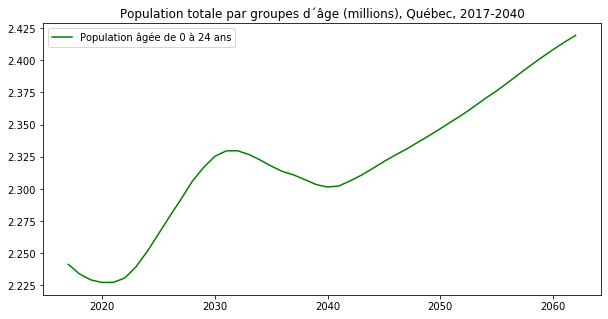

In [24]:
plt.figure(figsize=(10,5))
plt.plot(pop_024/1e6, label='Population âgée de 0 à 24 ans', color='green')
plt.legend()
plt.title('Population totale par groupes d´âge (millions), Québec, 2017-2040')
#plt.ylim(0, 10)
plt.show()

# Figure 2

In [25]:
base.stats.counts.head()

2017          2018  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  41136.960108  41791.727337   
    True  False none False   0     False  43243.726267  41739.612738   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

                                                  2019          2020  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  41517.516393  41691.276142   
    True  False none False   0     False  41928.442060  42342.492257   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

                                                  2021          2022  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  41819.773048  42925.335532   
    True  False none False   0     False  42618.506091  41719.575973   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

                                                  2023          2024  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  42333.578987  42600.405850   
    True  False none False   0     False  42285.663612  42016.727591   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

                                                  2025          2026  ...  \
age male  insch educ married nkids chsld                              ...   
0   False False none False   0     False  42284.048512  41446.656465  ...   
    True  False none False   0     False  42170.923741  42776.481819  ...   
1   False False dec  False   0     False      0.000000      0.000000  ...   
                                   True       0.000000      0.000000  ...   
                             1     False      0.000000      0.000000  ...   

                                                  2053         2054  \
age male  insch educ married nkids chsld                              
0   False False none False   0     False  44682.266669  45156.57382   
    True  False none False   0     False  44177.714877  43704.00223   
1   False False dec  False   0     False      0.000000      0.00000   
                                   True       0.000000      0.00000   
                             1     False      0.000000      0.00000   

                                                  2055          2056  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  44590.486929  44085.565343   
    True  False none False   0     False  44161.247315  44597.637920   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

                                                  2057          2058  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  44045.871679  44293.726040   
    True  False none False   0     False  44629.360904  44243.903075   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000 

In [26]:
pop =base.stats.freq()
pop_m=base.stats.freq(sub='male==True')
pop_f=base.stats.freq(sub='male==False')

Creation de "DataFrame" contenant la populaton par groupe d'âge

In [27]:
pop_age=base.stats.freq('age')
bins=[-1,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,101]
bins_3=[-1,5,17,35, 101]
pop_age_gr=base.stats.freq('age', bins=bins)
pop_age_gr.columns= pop_age_gr.columns.astype('str')
pop_age_gr3=base.stats.freq('age', bins=bins_3)
pop_age_gr3.columns= pop_age_gr3.columns.astype('str')

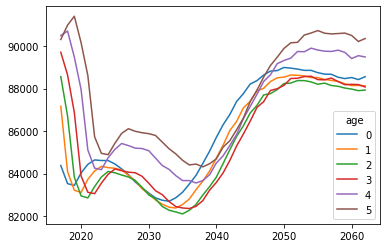

In [28]:
base.stats.freq('age', sub="age<=5").plot()

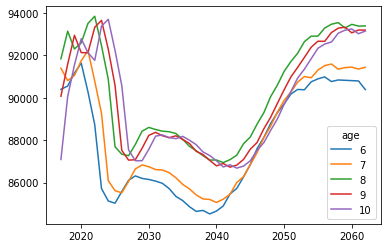

In [29]:
base.stats.freq('age', sub="age>=6 and age<=10").plot()

On charge ici les données provenant des derninères projections de l'ISQ. 

Il s'agit de projections de population basées sur le scénario moyen de l'ISQ à partir des données corrigées du recensement de 2016. Pour plus d'information concernant la méthodologie utilisée pour le calcul des projections de population, veuillez-vous référer au rapport « Perspectives démographiques du Québec et des régions, 2016-2066, édition 2019 » produit par l'ISQ à l'adresse suivante :

https://www.stat.gouv.qc.ca/statistiques/population-demographie/perspectives/perspectives-2016-2066.pdf

Pour la population de 1996-2018, il s'agit d'estimations de population constituant une série historique de populations comparables ayant servi à la construction des projections de population basées sur le recensement de 2016.

In [30]:
pop_isq = pd.read_csv(path_data+'isq_pop_age_1996_2041.csv', sep=';')
pop_isq = pop_isq.set_index('year')

Population totale par âge sexe

In [31]:
pop_isq_age = pop_isq.drop(['total'],axis=1)
pop_isq_age_tot=pop_isq_age.loc[pop_isq['sex']=='all']
pop_isq_age_tot_m=pop_isq_age.loc[pop_isq['sex']=='male']
pop_isq_age_tot_f=pop_isq_age.loc[pop_isq['sex']=='female']
pop_isq_age_tot = pop_isq_age_tot.drop(['sex'],axis=1)
pop_isq_age_tot_m = pop_isq_age_tot_m.drop(['sex'],axis=1)
pop_isq_age_tot_f = pop_isq_age_tot_f.drop(['sex'],axis=1)

Population par groupe d'âge

In [32]:
pop_isq_age_tot_trans = pop_isq_age_tot.T
pop_isq_age_tot_trans
pop_isq_age_tot_trans['age']= range(0,91)
bins=list(range(0,96,5))
bins_3=[0,25,65,91]
pop_isq_age_tot_trans['agegr'] = pd.cut(pop_isq_age_tot_trans['age'], bins=bins, right=False)
gr=pop_isq_age_tot_trans.groupby(['agegr']).sum()
pop_isq_agegr_tot=gr.drop(['age'],axis=1).T
pop_isq_agegr_tot.columns= pop_isq_agegr_tot.columns.astype('str')
pop_isq_agegr_tot = pop_isq_agegr_tot[pop_isq_agegr_tot.index>=2017]
pop_isq_age_tot_trans['agegr'] = pd.cut(pop_isq_age_tot_trans['age'], bins=bins_3, right=False)
gr=pop_isq_age_tot_trans.groupby(['agegr']).sum()
pop_isq_agegr3_tot=gr.drop(['age'],axis=1).T
pop_isq_agegr3_tot.columns= pop_isq_agegr3_tot.columns.astype('str')
pop_isq_agegr3_tot = pop_isq_agegr3_tot[pop_isq_agegr3_tot.index>=2017]

Population totale par sexe

In [33]:
pop_isq_total=pop_isq.loc[pop_isq['sex']=='all']
pop_isq_total =pop_isq_total['total']
pop_isq_total_m = pop_isq.loc[pop_isq['sex']=='male']
pop_isq_total_m =pop_isq_total_m['total']
pop_isq_total_f = pop_isq.loc[pop_isq['sex']=='female']
pop_isq_total_f =pop_isq_total_f['total']

## Figue comparaison population

### Population totale 

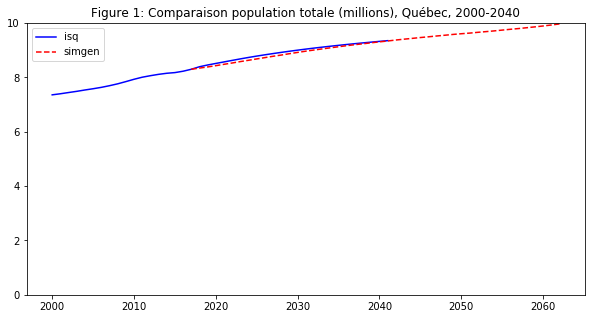

In [34]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_total[pop_isq_total.index>=2000]/1e6, label='isq', color='blue')
plt.plot(pop/1e6, label='simgen', linestyle='dashed', color='red')
plt.legend()
plt.title('Figure 1: Comparaison population totale (millions), Québec, 2000-2040')
plt.ylim(0, 10)
plt.show()

### Comparaison popuation par sexe

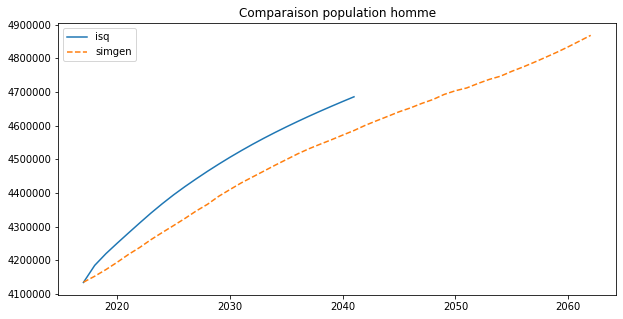

In [35]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_total_m[pop_isq_total_m.index>=2017], label='isq')
plt.plot(pop_m, label='simgen', linestyle='dashed')
plt.legend()
plt.title('Comparaison population homme')
plt.show()

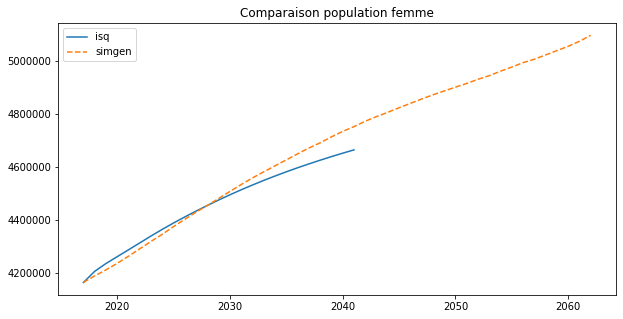

In [36]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_total_f[pop_isq_total_m.index>=2017], label='isq')
plt.plot(pop_f, label='simgen', linestyle='dashed')
plt.legend()
plt.title('Comparaison population femme')
plt.show()

### Comparaison population par groupe d'âge

KeyError: '(-1, 24]'

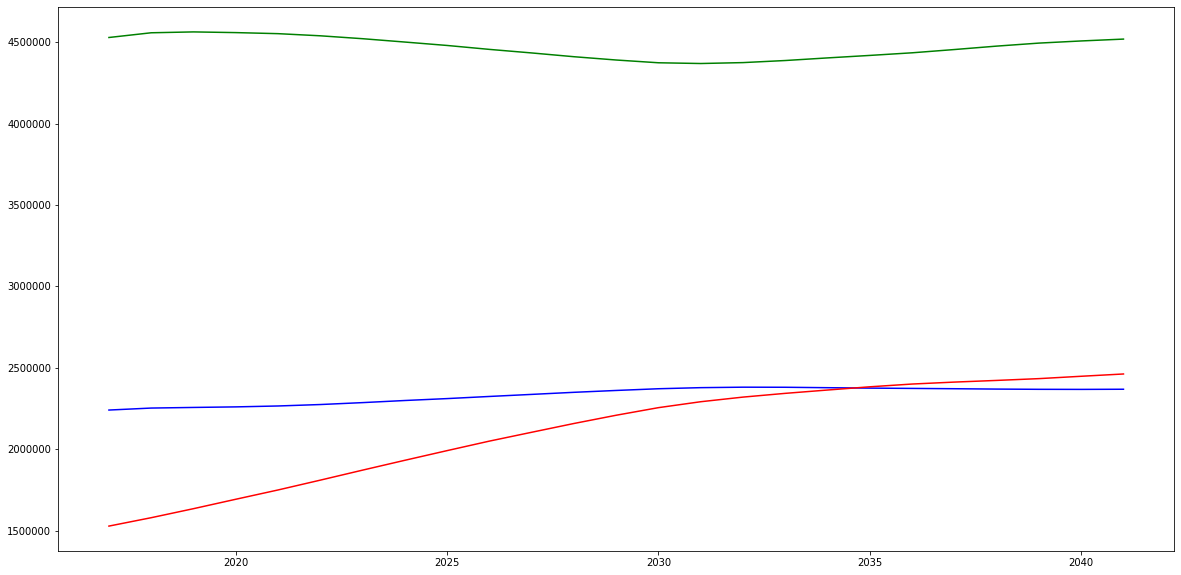

In [37]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr3_tot['[0, 25)'], label='isq 0-25', color='blue')
plt.plot(pop_isq_agegr3_tot['[25, 65)'], label='isq 25-65', color='green')
plt.plot(pop_isq_agegr3_tot['[65, 91)'], label='isq 65+', color='red')
plt.plot(pop_age_gr3['(-1, 24]'], label='simgen 0-25',color='blue', linestyle='dashed')
plt.plot(pop_age_gr3['(24, 64]'], label='simgen 25-65',color='green', linestyle='dashed')
plt.plot(pop_age_gr3['(64, 101]'], label='simgen 65+',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge")
plt.show()

### Comparaison groupe d'âge de 5 ans

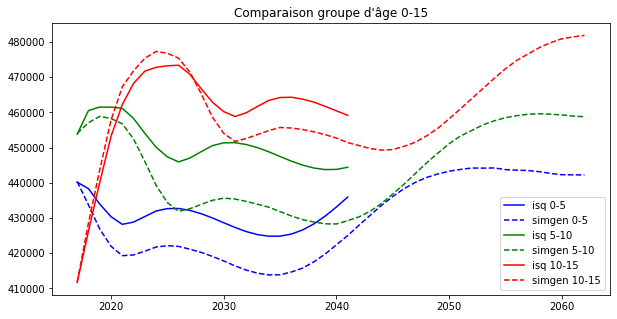

In [38]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_agegr_tot['[0, 5)'], label='isq 0-5', color='blue')
plt.plot(pop_age_gr['(-1, 4]'], label='simgen 0-5',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[5, 10)'], label='isq 5-10', color='green')
plt.plot(pop_age_gr['(4, 9]'], label='simgen 5-10',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[10, 15)'], label='isq 10-15', color='red')
plt.plot(pop_age_gr['(9, 14]'], label='simgen 10-15',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 0-15")
plt.show()

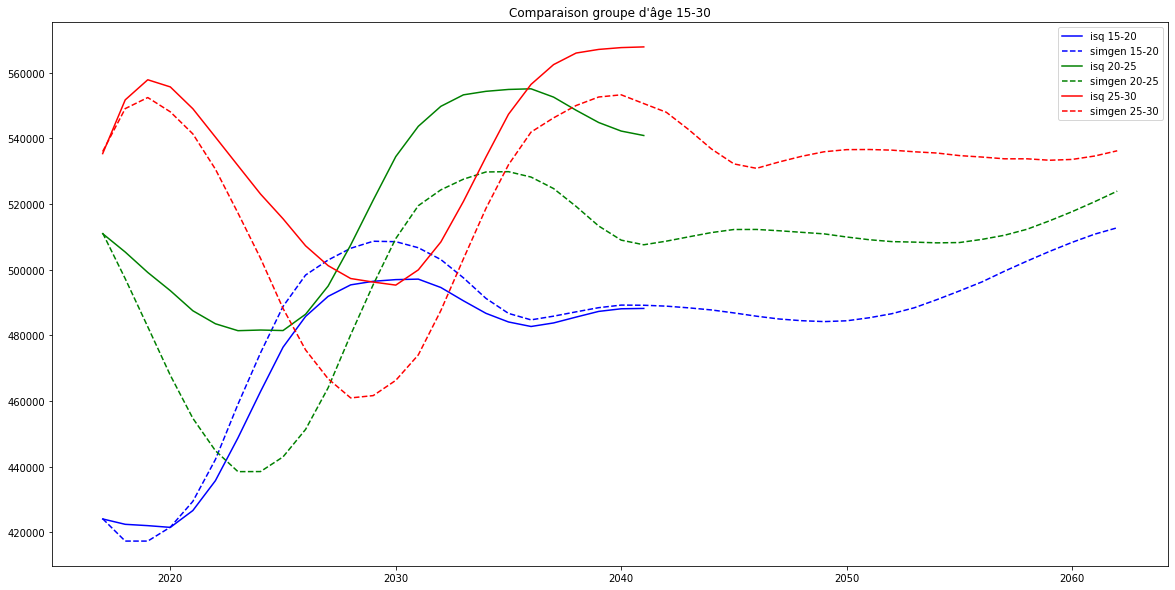

In [39]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[15, 20)'], label='isq 15-20', color='blue')
plt.plot(pop_age_gr['(14, 19]'], label='simgen 15-20',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[20, 25)'], label='isq 20-25', color='green')
plt.plot(pop_age_gr['(19, 24]'], label='simgen 20-25',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[25, 30)'], label='isq 25-30', color='red')
plt.plot(pop_age_gr['(24, 29]'], label='simgen 25-30',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 15-30")
plt.show()

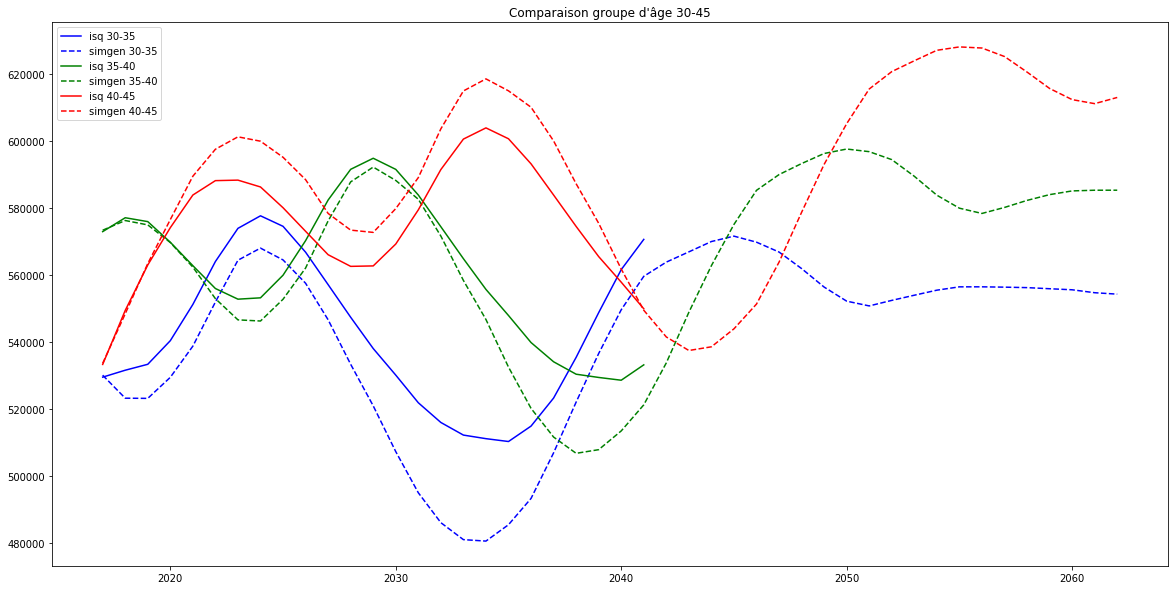

In [40]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[30, 35)'], label='isq 30-35', color='blue')
plt.plot(pop_age_gr['(29, 34]'], label='simgen 30-35',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[35, 40)'], label='isq 35-40', color='green')
plt.plot(pop_age_gr['(34, 39]'], label='simgen 35-40',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[40, 45)'], label='isq 40-45', color='red')
plt.plot(pop_age_gr['(39, 44]'], label='simgen 40-45',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 30-45")
plt.show()

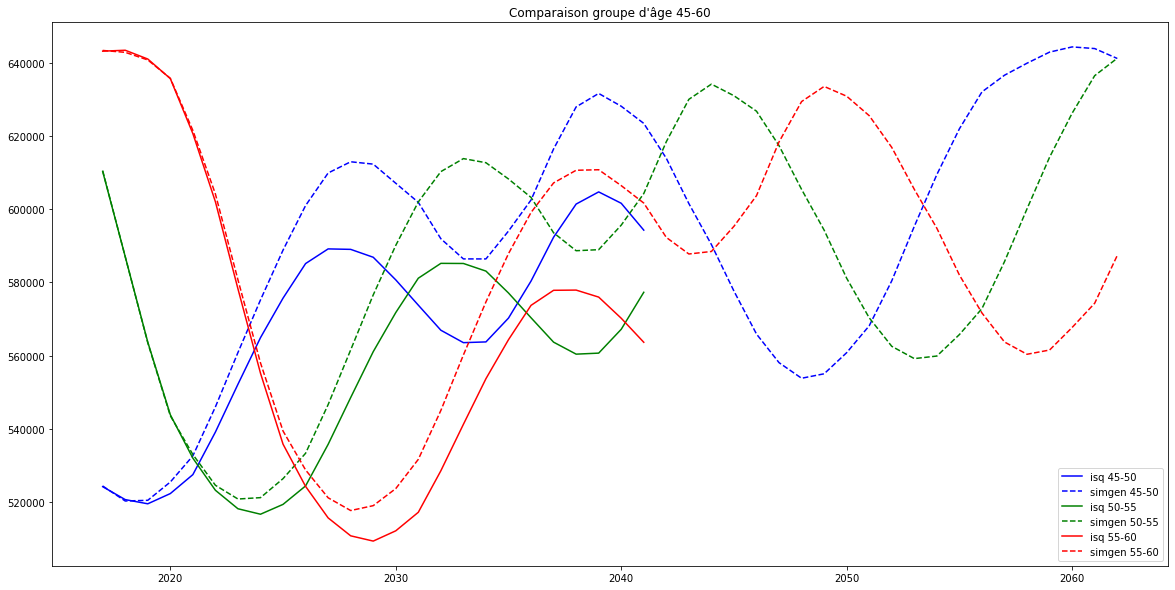

In [41]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[45, 50)'], label='isq 45-50', color='blue')
plt.plot(pop_age_gr['(44, 49]'], label='simgen 45-50',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[50, 55)'], label='isq 50-55', color='green')
plt.plot(pop_age_gr['(49, 54]'], label='simgen 50-55',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[55, 60)'], label='isq 55-60', color='red')
plt.plot(pop_age_gr['(54, 59]'], label='simgen 55-60',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 45-60")
plt.show()

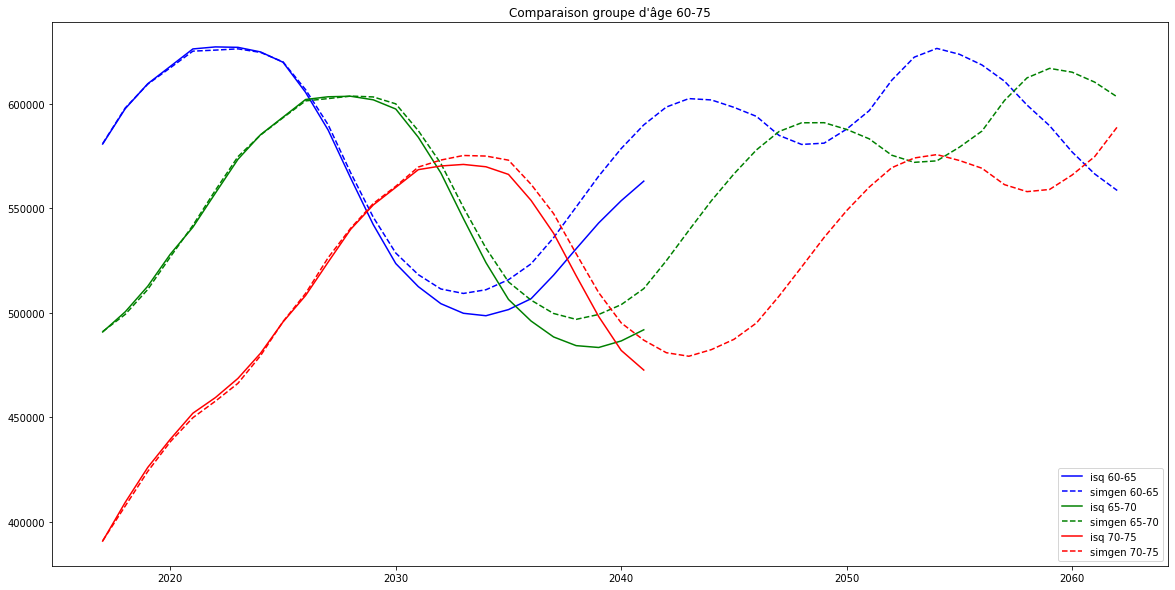

In [42]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[60, 65)'], label='isq 60-65', color='blue')
plt.plot(pop_age_gr['(59, 64]'], label='simgen 60-65',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[65, 70)'], label='isq 65-70', color='green')
plt.plot(pop_age_gr['(64, 69]'], label='simgen 65-70',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[70, 75)'], label='isq 70-75', color='red')
plt.plot(pop_age_gr['(69, 74]'], label='simgen 70-75',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 60-75")
plt.show()

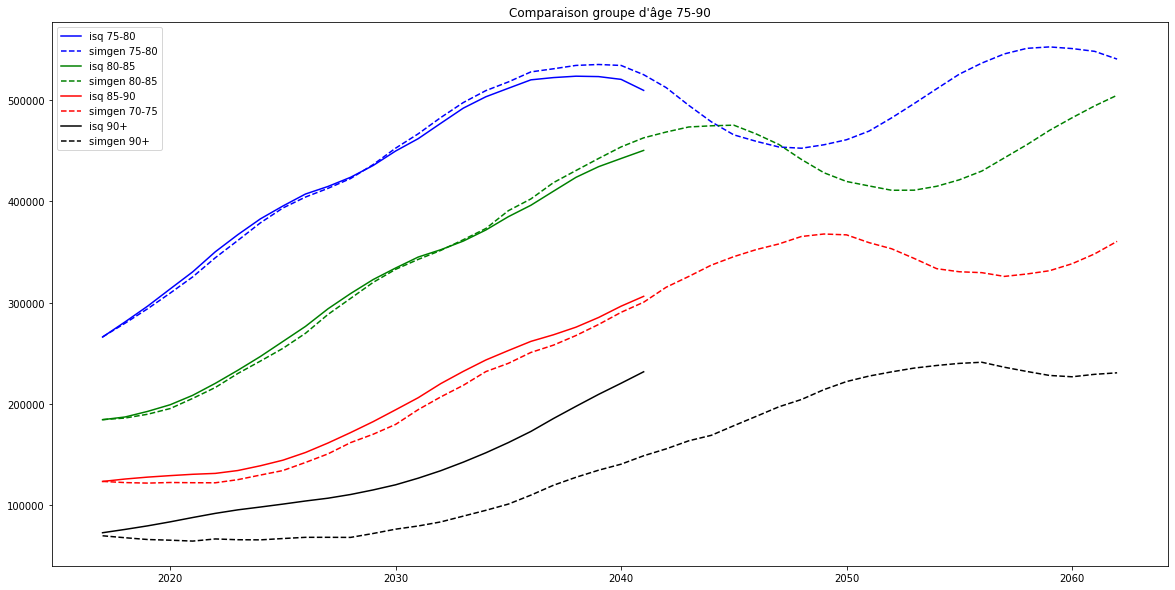

In [43]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[75, 80)'], label='isq 75-80', color='blue')
plt.plot(pop_age_gr['(74, 79]'], label='simgen 75-80',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[80, 85)'], label='isq 80-85', color='green')
plt.plot(pop_age_gr['(79, 84]'], label='simgen 80-85',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[85, 90)'], label='isq 85-90', color='red')
plt.plot(pop_age_gr['(84, 89]'], label='simgen 70-75',color='red', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[90, 95)'], label='isq 90+', color='black')
plt.plot(pop_age_gr['(89, 101]'], label='simgen 90+',color='black', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 75-90")
plt.show()

### Comparaison des naissances

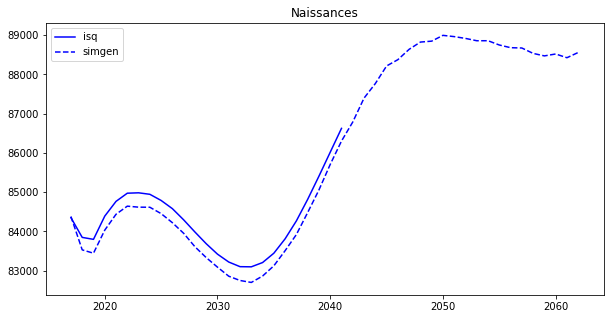

In [44]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_age_tot.loc[2017:,'0'], label='isq', color='blue')
plt.plot(pop_age[0], label='simgen',color='blue', linestyle='dashed')
plt.legend()
plt.title("Naissances")
plt.show()

# Éducation

## Extraction des données SimGen

Prenant en compte school_done

In [45]:
popeduc = base.stats.freq('educ')
propeduc15over = base.stats.prop('educ',sub='age>=15')
propeduc25overinsch = base.stats.prop('educ',sub='age>=25 and insch==False')
propeduc35overinsch = base.stats.prop('educ',sub='age>=35 and insch==False')
propeduc3544 = base.stats.prop('educ',sub='age>=35 and age<=44')
propeduc2564 = base.stats.prop('educ',sub='age>=25 and age<=64')
propeduc15overinsch = base.stats.prop('educ',sub='age>=15 and insch==False')
propeduc3544insch = base.stats.prop('educ',sub='age>=35 and age<=44 and insch==False')
propeduc2564insch = base.stats.prop('educ',sub='age>=25 and age<=64 and insch==False')

## Chargement des données isq

Source : Statistique Canada (SC), Enquête sur la population active (EPA), compilations de Statistique Canada et de l'Institut de la statistique du Québec réalisées grâce à l'accès aux données du Centre interuniversitaire québécois de statistiques sociales (CIQSS), membre du Réseau canadien des Centres de données de recherche (RCCDR). Adapté par l’Institut de la statistique du Québec (ISQ).

Mise à jour : 28 novembre 2019

https://www.stat.gouv.qc.ca/statistiques/education/niveau-scolarite/repartition-scol-ra-sexe-age.html#tri_tertr=50040000000000000&tri_sexe=1&tri_age=365&tri_stat=8403

In [46]:
pop_educ = pd.read_csv(path_data+'educ4_qc2.csv', sep=';')
pop_educ = pop_educ[pop_educ['year']>=2000]

Préparation des données par groupe d'âge

In [47]:
prop_educ_15over = pop_educ[pop_educ['age']=='15 ans et plus'] 
prop_educ_15over = prop_educ_15over[prop_educ_15over['sex']=='Total (hommes-femmes)']
prop_educ_15over = prop_educ_15over.set_index('year')
prop_educ_15over = prop_educ_15over.drop(columns=['age','sex','pop'])
prop_educ_3544 = pop_educ[pop_educ['age']=='35-44 ans'] 
prop_educ_3544 = prop_educ_3544[prop_educ_3544['sex']=='Total (hommes-femmes)']
prop_educ_3544 = prop_educ_3544.set_index('year')
prop_educ_3544 = prop_educ_3544.drop(columns=['age','sex','pop'])
prop_educ_2564 = pop_educ[pop_educ['age']=='25-64 ans'] 
prop_educ_2564 = prop_educ_2564[prop_educ_2564['sex']=='Total (hommes-femmes)']
prop_educ_2564 = prop_educ_2564.set_index('year')
prop_educ_2564 = prop_educ_2564.drop(columns=['age','sex','pop'])

Data Census 


In [48]:
census_educ = pd.read_csv(path_data+'census_educ.csv', sep=";")
census_educ.head()

,year,sex,educ4,age,pop,prop
0,2006,Total (hommes-femmes),uni,15 ans et plus,1015169,0.164761
1,2006,Total (hommes-femmes),dec,15 ans et plus,2010321,0.326273
2,2006,Total (hommes-femmes),none,15 ans et plus,1541716,0.250219
3,2006,Total (hommes-femmes),des,15 ans et plus,1594256,0.258746
4,2006,Total (hommes-femmes),none,25-64 ans,725237,0.171511


In [49]:
prop_educ_15over = census_educ[census_educ['age']=='15 ans et plus'] 
prop_educ_15over = prop_educ_15over[prop_educ_15over['sex']=='Total (hommes-femmes)']
prop_educ_15over = prop_educ_15over.set_index('year')
prop_educ_15over = prop_educ_15over.drop(columns=['age','sex','pop'])
prop_educ_3544 = census_educ[census_educ['age']=='35-44 ans'] 
prop_educ_3544 = prop_educ_3544[prop_educ_3544['sex']=='Total (hommes-femmes)']
prop_educ_3544 = prop_educ_3544.set_index('year')
prop_educ_3544 = prop_educ_3544.drop(columns=['age','sex','pop'])
prop_educ_2564 = census_educ[census_educ['age']=='25-64 ans'] 
prop_educ_2564 = prop_educ_2564[prop_educ_2564['sex']=='Total (hommes-femmes)']
prop_educ_2564 = prop_educ_2564.set_index('year')
prop_educ_2564 = prop_educ_2564.drop(columns=['age','sex','pop'])

Petite fonction pour graphiques d'éducation

In [50]:
def graph_educ(isq,simgen,title):
    plt.figure(figsize=(20,10))
    plt.plot(isq['prop'][isq['educ4']=='uni'],label='census uni', color='blue')
    plt.plot(simgen['uni'], label='simgen uni',color='blue', linestyle='dashed')
    plt.plot(isq['prop'][isq['educ4']=='dec'],label='census dec', color='green')
    plt.plot(simgen['dec'], label='simgen dec',color='green', linestyle='dashed')
    plt.plot(isq['prop'][isq['educ4']=='des'],label='census des', color='red')
    plt.plot(simgen['des'], label='simgen des',color='red', linestyle='dashed')
    plt.plot(isq['prop'][isq['educ4']=='none'],label='census none', color='black')
    plt.plot(simgen['none'], label='simgen des',color='black', linestyle='dashed')
    plt.legend()
    plt.title(title)
    plt.show()

### Graphiques comparaison éducation

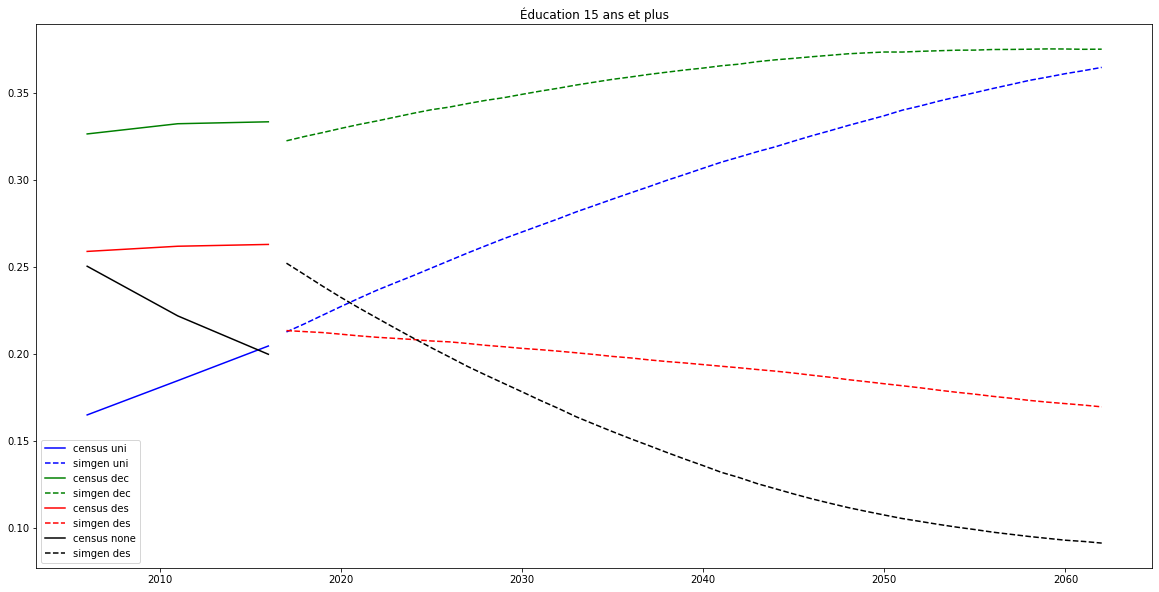

In [51]:
graph_educ(isq=prop_educ_15over,simgen=propeduc15overinsch,title='Éducation 15 ans et plus')

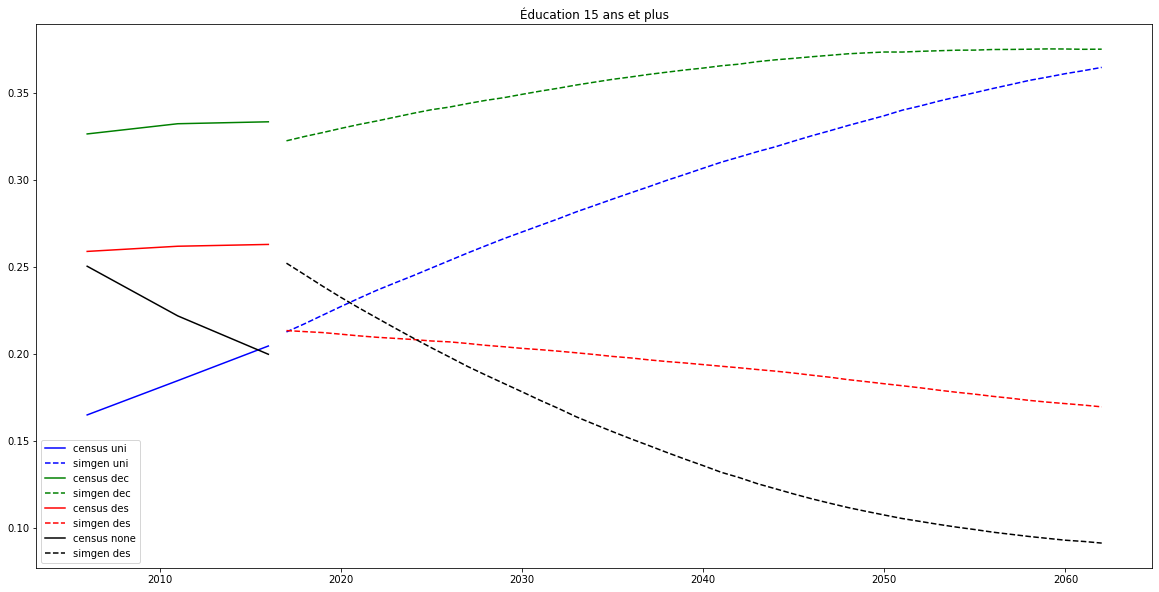

In [52]:
graph_educ(isq=prop_educ_15over,simgen=propeduc15overinsch,title='Éducation 15 ans et plus')

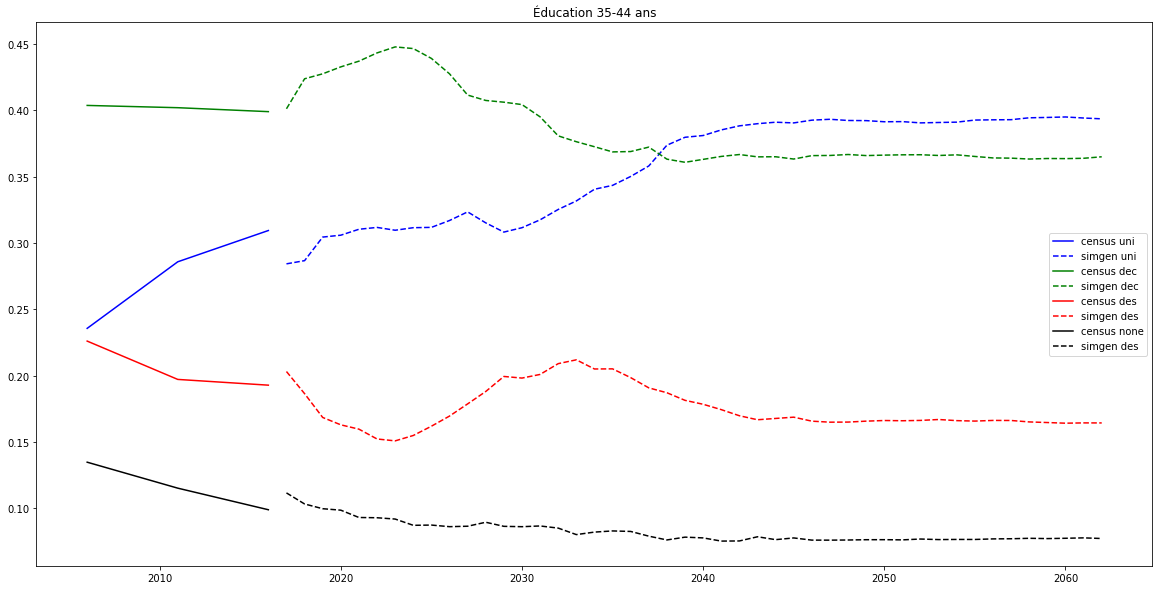

In [53]:
graph_educ(isq=prop_educ_3544, simgen=propeduc3544insch, title='Éducation 35-44 ans')

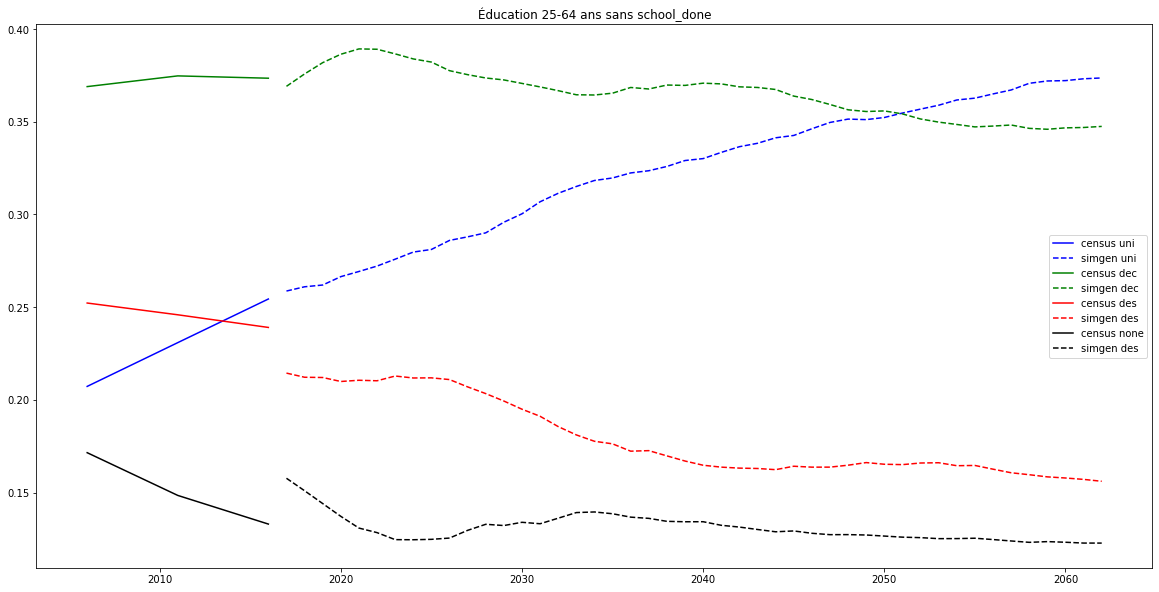

In [54]:
graph_educ(isq=prop_educ_2564,simgen=propeduc2564,title='Éducation 25-64 ans sans school_done')

In [55]:
graph_educ(simgen=propeduc2564,title='Éducation 25-64 ans sans school_done')

TypeError: graph_educ() missing 1 required positional argument: 'isq'

## Comparaison des personnes en couple



### Extraction données SimGen

Proportion des personnes en couple par groupe d'âge

In [56]:
popms = base.stats.freq('married')
propms15plus = base.stats.prop('married', sub="age>=15")
propms1544 = base.stats.prop('married', sub="age>=15 and age<=44")
propms4564 = base.stats.prop('married', sub="age>=45 and age<=64")
propms65plus = base.stats.prop('married', sub="age>=65")
propms15plus.columns= propms15plus.columns.astype('str')
propms1544.columns= propms1544.columns.astype('str')
propms4564.columns= propms4564.columns.astype('str')
propms65plus.columns= propms65plus.columns.astype('str')

### Extraction données Statistique Canada

Estimations de la population au 1er juillet, selon l'état matrimonial ou l'état matrimonial légal, l'âge et le sexe, Tableau : 17-10-0060-01

https://www150.statcan.gc.ca/t1/tbl1/fr/cv.action?pid=1710006001

In [57]:
pop_ms = pd.read_csv(path_data+'married_qc.csv', sep=';')
pop_ms=pop_ms[pop_ms['married']==1]
pop_ms_15plus = pop_ms[pop_ms["age"]=="15 ans et plus"]
pop_ms_15plus = pop_ms_15plus.set_index(pop_ms_15plus["year"])
pop_ms_1544 = pop_ms[pop_ms["age"]=="15 à 44 ans"]
pop_ms_1544 = pop_ms_1544.set_index(pop_ms_1544["year"])
pop_ms_4564 = pop_ms[pop_ms["age"]=="45 à 64 ans"]
pop_ms_4564 = pop_ms_4564.set_index(pop_ms_4564["year"])
pop_ms_65plus = pop_ms[pop_ms["age"]=="65 ans et plus"]
pop_ms_65plus = pop_ms_65plus.set_index(pop_ms_65plus["year"])

Petite fonction pour graphiques de comparaison des unions

In [58]:
def graph_union(isq,simgen,title):
    plt.figure(figsize=(10,5))
    plt.plot(isq['prop'], label='isq couple',color='blue')
    plt.plot(1-isq['prop'],label="isq single",color='green')
    plt.plot(simgen["True"],label="simgen couple", color="blue", linestyle='dashed')
    plt.plot(1-simgen["True"], label='simgen single',color='green', linestyle='dashed')
    plt.legend()
    plt.title(title)

### Graphiques comparaioson des personnes en couple par groupe d'âge

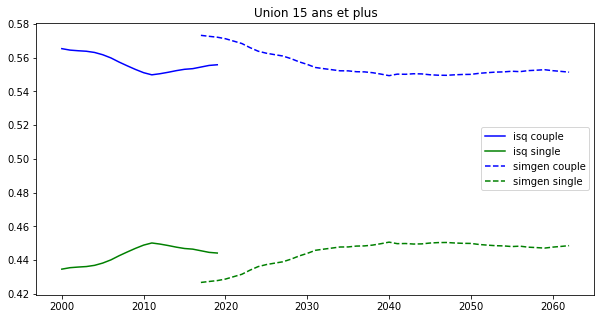

In [59]:
graph_union(pop_ms_15plus,propms15plus,title="Union 15 ans et plus")

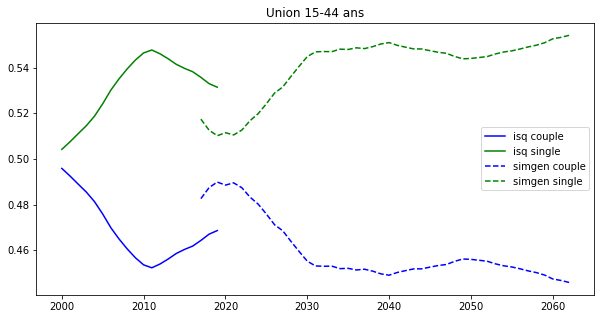

In [60]:
graph_union(pop_ms_1544,propms1544,title="Union 15-44 ans")

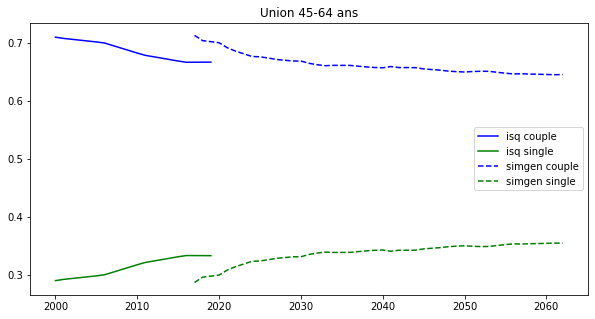

In [61]:
graph_union(pop_ms_4564,propms4564,title="Union 45-64 ans")

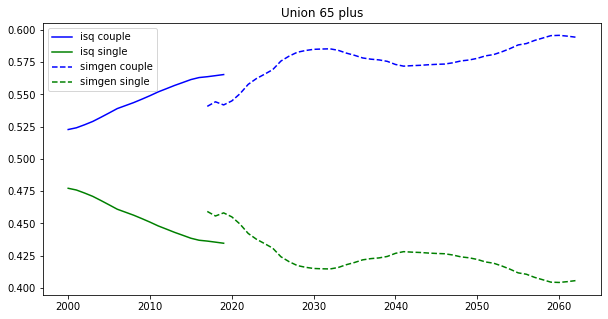

In [62]:
graph_union(pop_ms_65plus,propms65plus,title="Union 65 plus")

Comparaison education données de Statistiques Canada

In [63]:
pop_educ_stc = pd.read_csv(path_data+'educ4_qc_stc.csv', sep=';')
pop_educ_stc = pop_educ_stc[pop_educ_stc['year']>=2000]
pop_educ_stc

,year,sex,age,educ4,pop,prop
1080,2000,Femmes,15 ans et plus,dec,862600.0,0.287313
1081,2000,Femmes,15 ans et plus,des,731300.0,0.243580
1082,2000,Femmes,15 ans et plus,none,1001500.0,0.333578
1083,2000,Femmes,15 ans et plus,uni,406900.0,0.135529
1084,2000,Hommes,15 ans et plus,dec,862800.0,0.298961
...,...,...,...,...,...,...
3235,2019,Hommes,65 ans et plus,uni,158400.0,0.214054
3236,2019,Total (hommes-femmes),65 ans et plus,dec,442000.0,0.277047
3237,2019,Total (hommes-femmes),65 ans et plus,des,329600.0,0.206594
3238,2019,Total (hommes-femmes),65 ans et plus,none,543900.0,0.340918


In [64]:
prop_educ_stc_15over = pop_educ_stc[pop_educ_stc['age']=='15 ans et plus'] 
prop_educ_stc_15over = prop_educ_stc_15over[prop_educ_stc_15over['sex']=='Total (hommes-femmes)']
prop_educ_stc_15over = prop_educ_stc_15over.set_index('year')
prop_educ_stc_15over = prop_educ_stc_15over.drop(columns=['age','sex','pop'])
prop_educ_stc_25over = pop_educ_stc[pop_educ_stc['age']=='25 ans et plus'] 
prop_educ_stc_25over = prop_educ_stc_25over[prop_educ_stc_25over['sex']=='Total (hommes-femmes)']
prop_educ_stc_25over = prop_educ_stc_25over.set_index('year')
prop_educ_stc_25over = prop_educ_stc_25over.drop(columns=['age','sex','pop'])

prop_educ_stc_35over = pop_educ_stc[pop_educ_stc['age']=='25 ans et plus'] 
prop_educ_stc_35over = prop_educ_stc_35over[prop_educ_stc_35over['sex']=='Total (hommes-femmes)']
prop_educ_stc_35over = prop_educ_stc_35over.set_index('year')
prop_educ_stc_35over = prop_educ_stc_35over.drop(columns=['age','sex','pop'])

prop_educ_stc_3544 = pop_educ_stc[pop_educ_stc['age']=='35-44 ans'] 
prop_educ_stc_3544 = prop_educ_stc_3544[prop_educ_stc_3544['sex']=='Total (hommes-femmes)']
prop_educ_stc_3544 = prop_educ_stc_3544.set_index('year')
prop_educ_stc_3544 = prop_educ_stc_3544.drop(columns=['age','sex','pop'])
prop_educ_stc_2564 = pop_educ_stc[pop_educ_stc['age']=='25-64 ans'] 
prop_educ_stc_2564 = prop_educ_stc_2564[prop_educ_stc_2564['sex']=='Total (hommes-femmes)']
prop_educ_stc_2564 = prop_educ_stc_2564.set_index('year')
prop_educ_stc_2564 = prop_educ_stc_2564.drop(columns=['age','sex','pop'])

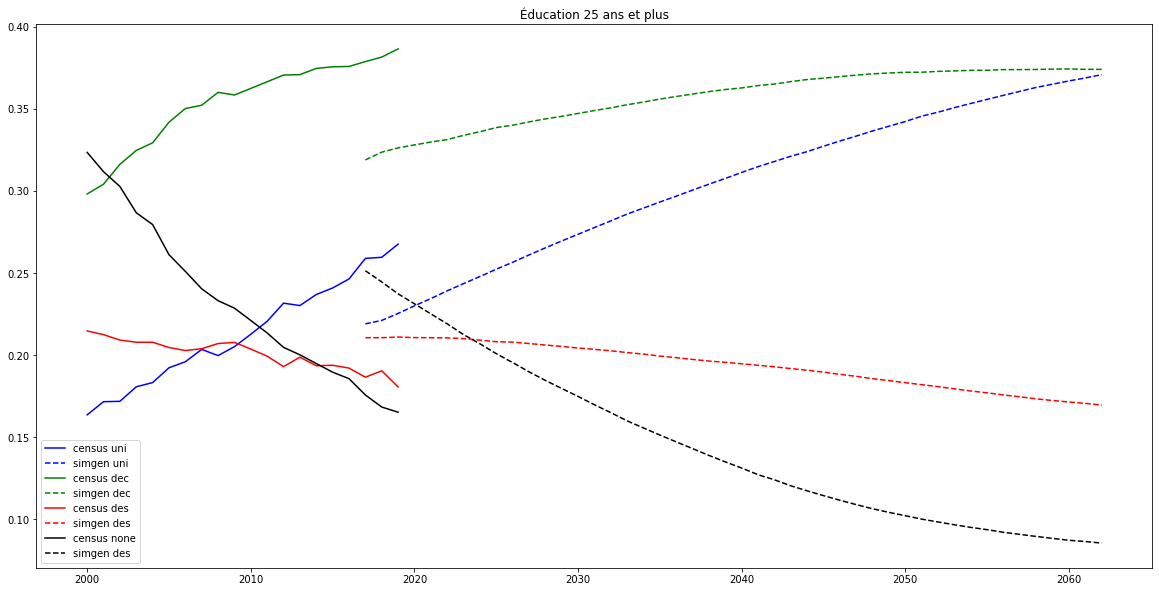

In [65]:
graph_educ(isq=prop_educ_stc_25over,simgen=propeduc25overinsch,title='Éducation 25 ans et plus')

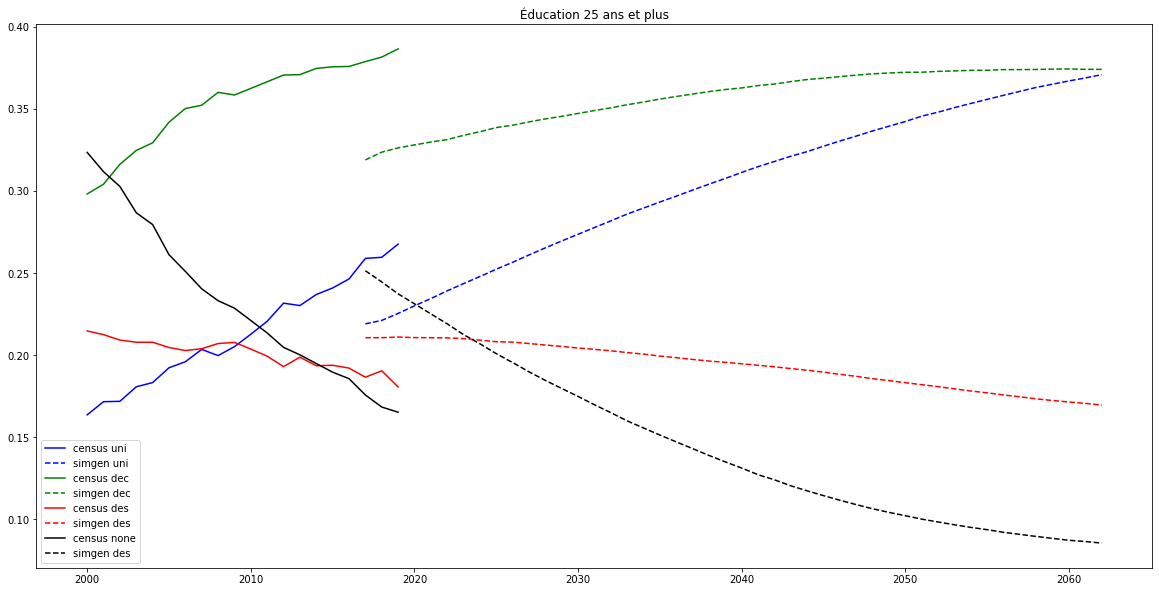

In [66]:
graph_educ(isq=prop_educ_stc_25over,simgen=propeduc25overinsch,title='Éducation 25 ans et plus')

In [67]:
prop_educ_stc_35over

,educ4,prop
year,,
2000,dec,0.298150
2000,des,0.214721
2000,none,0.323485
2000,uni,0.163644
2001,dec,0.304138
...,...,...
2018,uni,0.259603
2019,dec,0.386523
2019,des,0.180640


In [68]:
prop_educ_15over

,educ4,prop
year,,
2006,uni,0.164761
2006,dec,0.326273
2006,none,0.250219
2006,des,0.258746
2011,none,0.221684
2011,dec,0.332138
2011,des,0.261719
2011,uni,0.184459
2016,none,0.199619


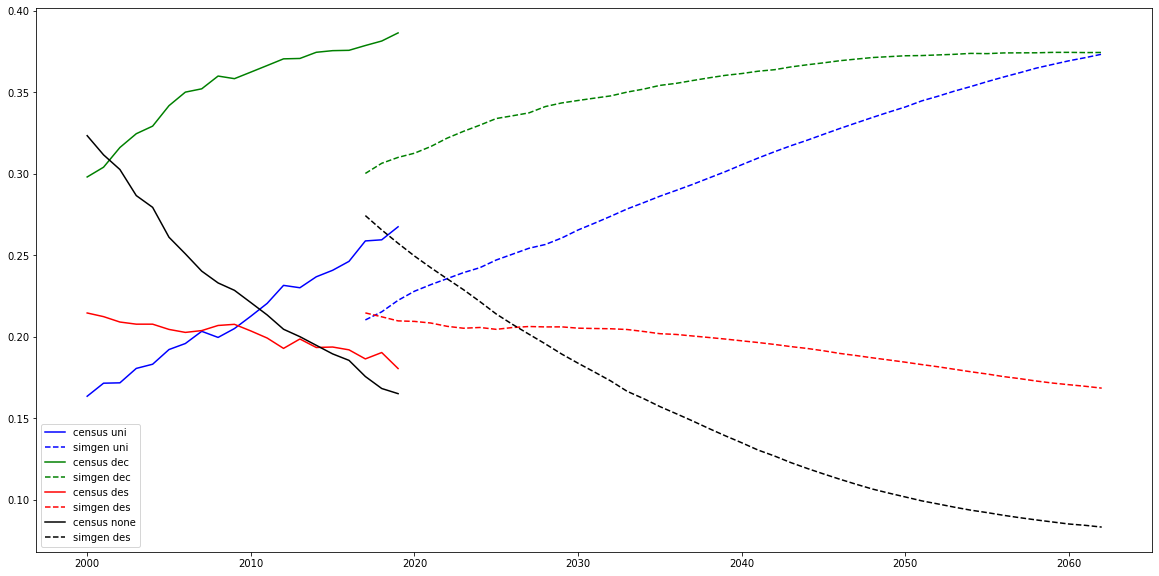

In [69]:
graph_educ(isq=prop_educ_stc_35over, simgen=propeduc35overinsch, title="")

## Graphique Étudiants

In [70]:
base.stats.freq("age", sub='educ4==none and age>16 and age<36').T.sum().plot()

UndefinedVariableError: name 'educ4' is not defined

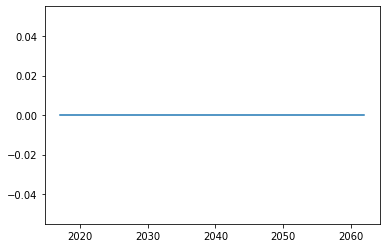

In [71]:
base.stats.freq("age", sub='insch==True and age>36').T.sum().plot()

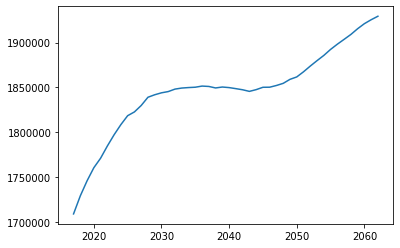

In [72]:
base.stats.freq("age", sub='insch==True and age>5 and age<35').T.sum().plot()

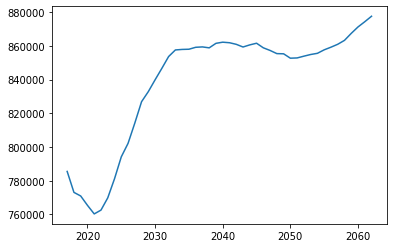

In [73]:
base.stats.freq("age", sub='insch==True and age>16').T.sum().plot()

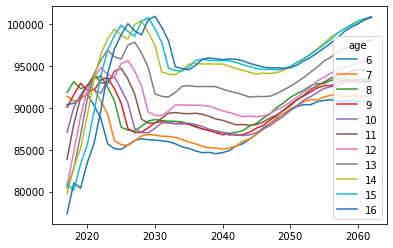

In [74]:
base.stats.freq("age", sub='insch==True and age>5 and age<17').plot()

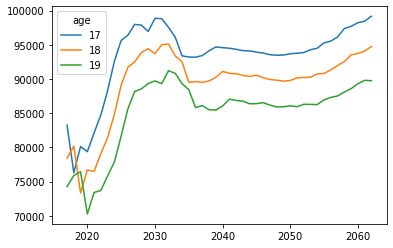

In [75]:
base.stats.freq("age", sub='insch==True and age>16 and age<20').plot()

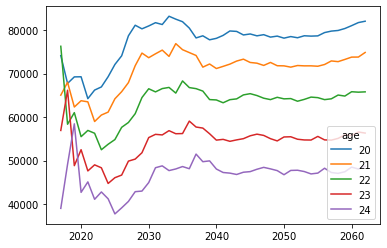

In [76]:
base.stats.freq("age", sub='insch==True and age>19 and age<25').plot()

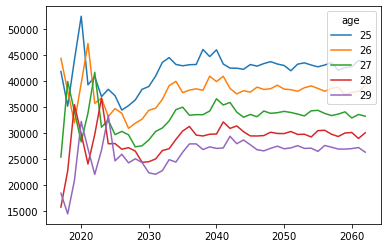

In [77]:
base.stats.freq("age", sub='insch==True and age>24 and age<30').plot()

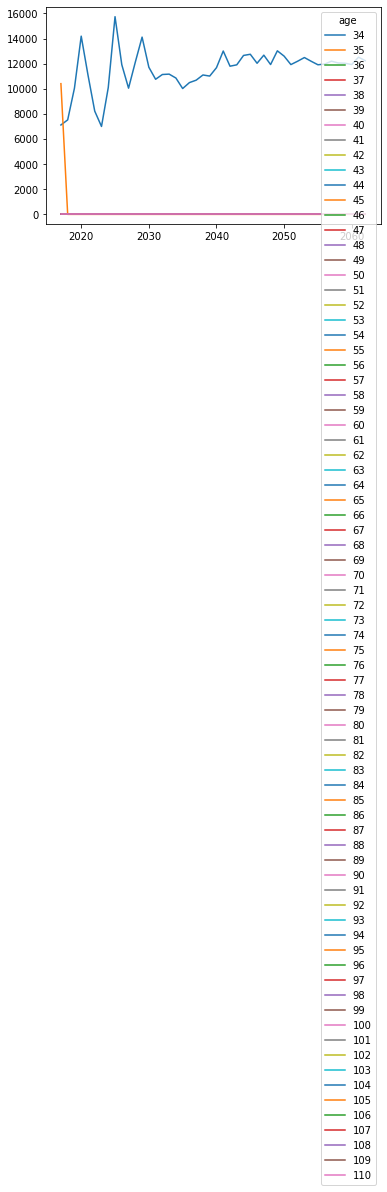

In [78]:
base.stats.freq("age", sub='insch==True and age>=34').plot()

## Famille

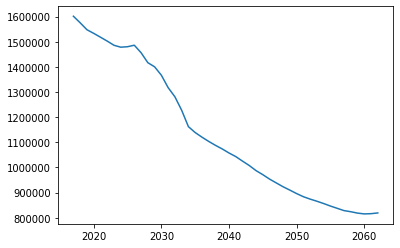

In [79]:
base.stats.freq("nkids", sub="nkids>0").T.sum().plot()

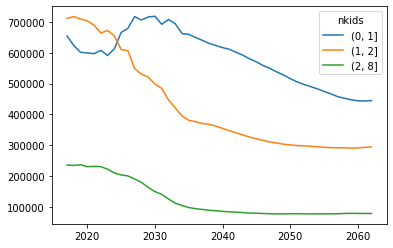

In [80]:
kids_count = [0,1,2,8]
base.stats.freq("nkids", bins=kids_count).plot()

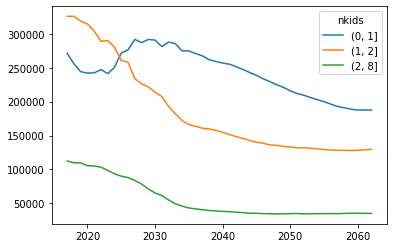

In [81]:
nkids_couple=base.stats.freq("nkids", bins=kids_count, sub="married==True")
nkids_couple=nkids_couple/2
nkids_couple.plot()

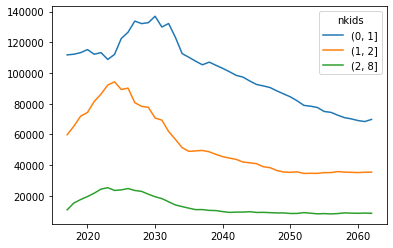

In [82]:
nkids_single=base.stats.freq("nkids", bins=kids_count, sub="married==False")
nkids_single.plot()

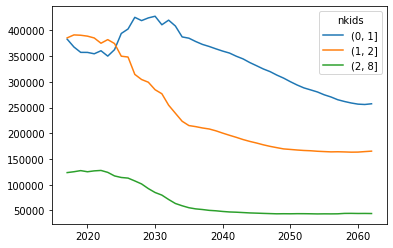

In [83]:
nkids= nkids_couple+nkids_single
nkids.plot()

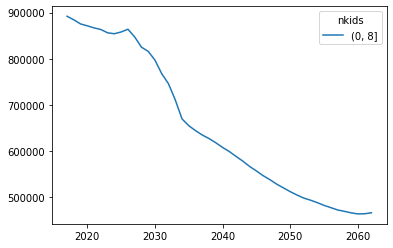

In [84]:
bk = [0, 8]
kids_couple=base.stats.freq("nkids", bins=bk, sub="married==True")
kids_couple=kids_couple/2
kids_single=base.stats.freq("nkids", bins=bk, sub="married==False")
kids = kids_single+kids_couple
kids.plot()

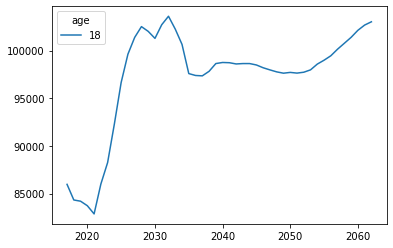

In [85]:
base.stats.freq('age', sub="age==18").plot()

# Analyse des pyramides des âges

In [86]:
baset=base.stats.freq('age').T

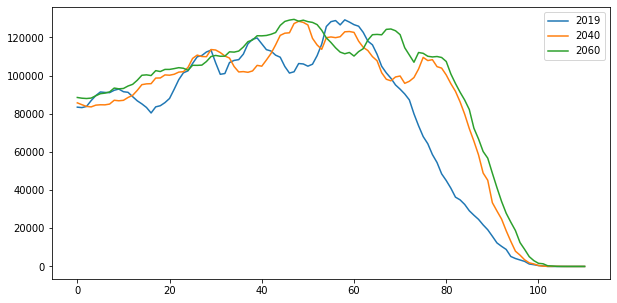

In [87]:
plt.figure(figsize=(10,5))
plt.plot(baset[[2019]],label='2019')
#plt.plot(baset[[2025]],label='2025')
#plt.plot(baset[[2030]],label='2030')
#plt.plot(baset[[2035]],label='2035')
plt.plot(baset[[2040]],label='2040')
#plt.plot(baset[[2045]],label='2045')
#plt.plot(baset[[2050]],label='2050')
#plt.plot(baset[[2055]],label='2055')
plt.plot(baset[[2060]],label='2060')
plt.legend()

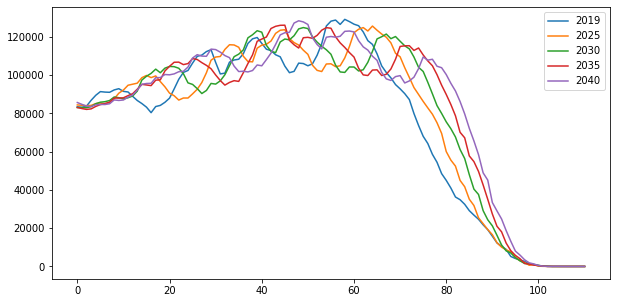

In [88]:
plt.figure(figsize=(10,5))
plt.plot(baset[[2019]],label='2019')
plt.plot(baset[[2025]],label='2025')
plt.plot(baset[[2030]],label='2030')
plt.plot(baset[[2035]],label='2035')
plt.plot(baset[[2040]],label='2040')

plt.legend()

In [89]:
newimmig = pd.read_pickle('/Users/juliennavaux/Dropbox (CEDIA)/OLG_CAN/demo/simgen/tests/newimmpopchsld.pkl')

In [90]:
newimmig.hh

,wgt,byr,male,educ,insch,nkids,married,chsld
nas,,,,,,,,
380,4.785705,1999,True,des,True,0,False,False
381,6.985487,1965,True,uni,False,0,True,False
382,5.967297,1980,False,uni,False,0,True,False
383,5.214085,1998,False,dec,True,0,False,False
384,5.583322,1999,True,des,True,0,False,False
...,...,...,...,...,...,...,...,...
60876,128.976341,2014,False,none,False,<NA>,False,False
60877,134.320402,2011,True,none,True,<NA>,False,False
60878,128.074409,2014,False,none,False,<NA>,False,False


In [91]:
newimmig.hh['age']= 2017-newimmig.hh['byr']+ np.random.randint(-3,4,size=len(newimmig.hh))

In [92]:
age = newimmig.hh.groupby(by=['age']).sum()
age

,wgt,byr,male,insch,nkids,married,chsld
age,,,,,,,
0,989.929055,6043.0,1.0,0.0,0,0.0,0.0
1,3968.488331,8052.0,2.0,0.0,0,0.0,0.0
2,2822.288451,8050.0,0.0,2.0,0,0.0,0.0
3,3546.399356,16103.0,2.0,3.0,0,0.0,0.0
4,2360.257093,6039.0,2.0,1.0,0,0.0,0.0
...,...,...,...,...,...,...,...
56,156.463501,3924.0,2.0,0.0,0,2.0,0.0
57,3303.794912,7851.0,1.0,0.0,0,1.0,0.0
60,374.685585,1959.0,0.0,0.0,0,1.0,0.0


In [93]:
popstc=pd.read_excel('/Users/juliennavaux/Dropbox (CEDIA)/OLG_CAN/demo/Benchmark/pop_age_stc.xlsx')
popstc=popstc.set_index('year')
#popstc=popstc[popstc.age>=20]
popstc

,age,pop
year,,
2018,0,83800.0
2019,0,84600.0
2020,0,84800.0
2021,0,84700.0
2022,0,84700.0
...,...,...
2036,99,2100.0
2037,99,2300.0
2038,99,2400.0


In [94]:
pop2019=popstc.loc[2019]
pop2019=pop2019.set_index('age')
pop2030=popstc.loc[2030]
pop2030=pop2030.set_index('age')
pop2040=popstc.loc[2040]
pop2040=pop2040.set_index('age')

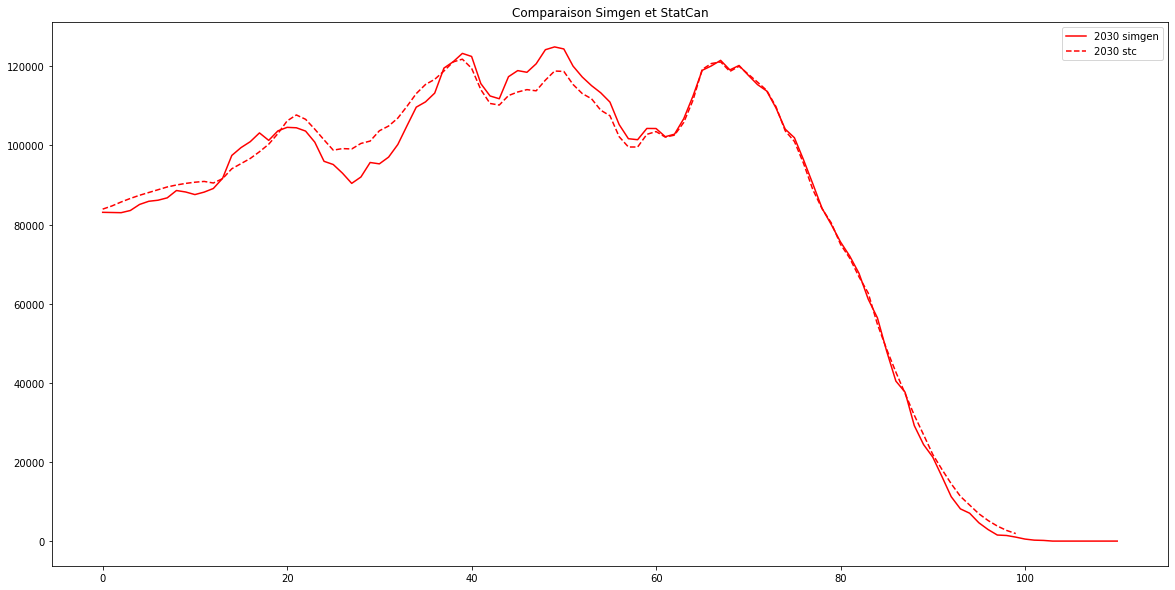

In [95]:
plt.figure(figsize=(20,10))
#plt.plot(baset[[2019]],label='2019 simgen', color='blue')
#plt.plot(pop2019,label='2019 stc',color='blue',linestyle='dashed')
plt.plot(baset[[2030]],label='2030 simgen', color='red')
plt.plot(pop2030,label='2030 stc', color='red', linestyle='dashed')
#plt.plot(baset[[2040]],label='2040 simgem',color='green')
#plt.plot(pop2040,label='2040 stc', color='green', linestyle='dashed')
plt.title('Comparaison Simgen et StatCan')
plt.legend()
plt.show()

In [96]:
popisq=pd.read_excel('/Users/juliennavaux/Dropbox (CEDIA)/OLG_CAN/demo/Benchmark/pop_age_isq.xlsx')
popisq= popisq.set_index('year')

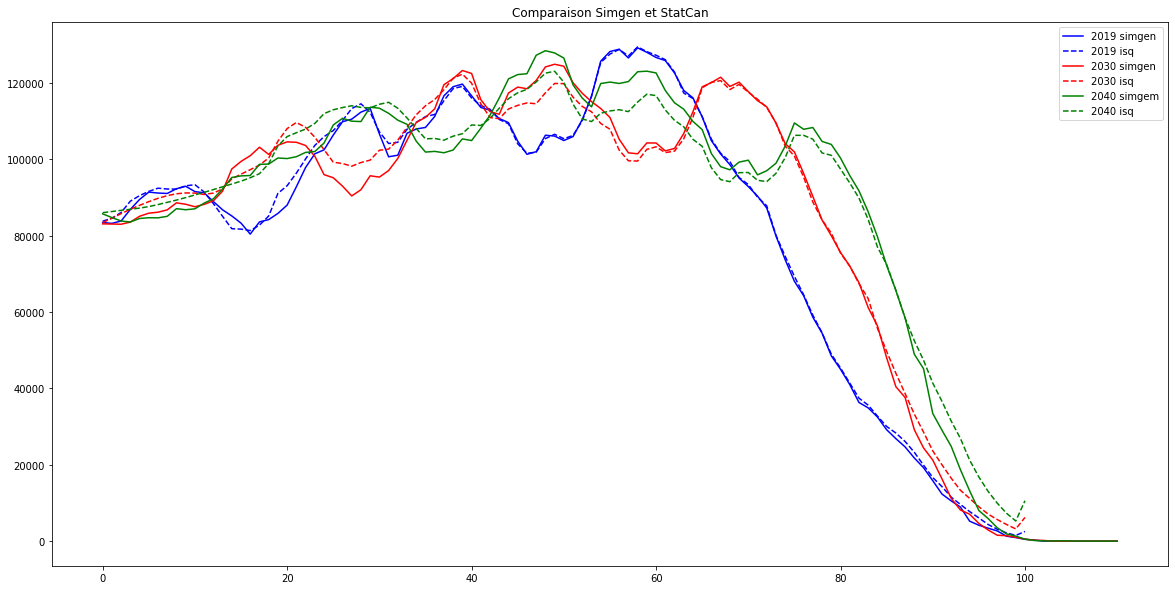

In [97]:
plt.figure(figsize=(20,10))
plt.plot(baset[[2019]],label='2019 simgen', color='blue')
plt.plot(popisq.loc[2019],label='2019 isq',color='blue',linestyle='dashed')
plt.plot(baset[[2030]],label='2030 simgen', color='red')
plt.plot(popisq.loc[2030],label='2030 isq', color='red', linestyle='dashed')
plt.plot(baset[[2040]],label='2040 simgem',color='green')
plt.plot(popisq.loc[2040],label='2040 isq', color='green', linestyle='dashed')
plt.title('Comparaison Simgen et StatCan')
plt.legend()
plt.show()

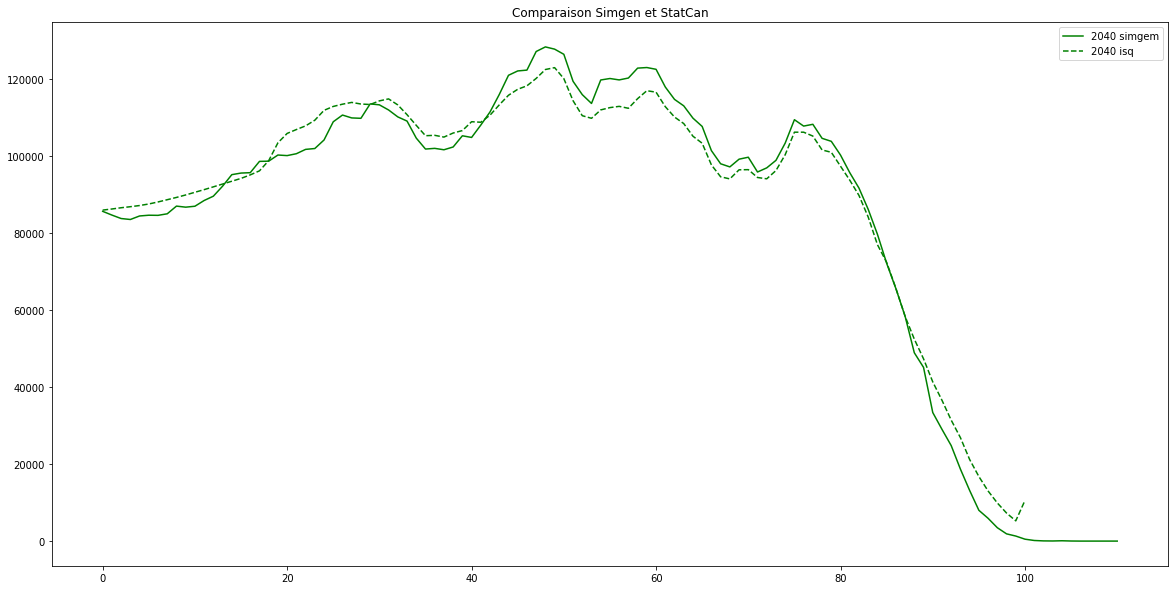

In [98]:
plt.figure(figsize=(20,10))
#plt.plot(baset[[2019]],label='2019 simgen', color='blue')
#plt.plot(popisq.loc[2019],label='2019 isq',color='blue',linestyle='dashed')
#plt.plot(baset[[2030]],label='2030 simgen', color='red')
#plt.plot(popisq.loc[2030],label='2030 isq', color='red', linestyle='dashed')
plt.plot(baset[[2040]],label='2040 simgem',color='green')
plt.plot(popisq.loc[2040],label='2040 isq', color='green', linestyle='dashed')
plt.title('Comparaison Simgen et StatCan')
plt.legend()
plt.show()

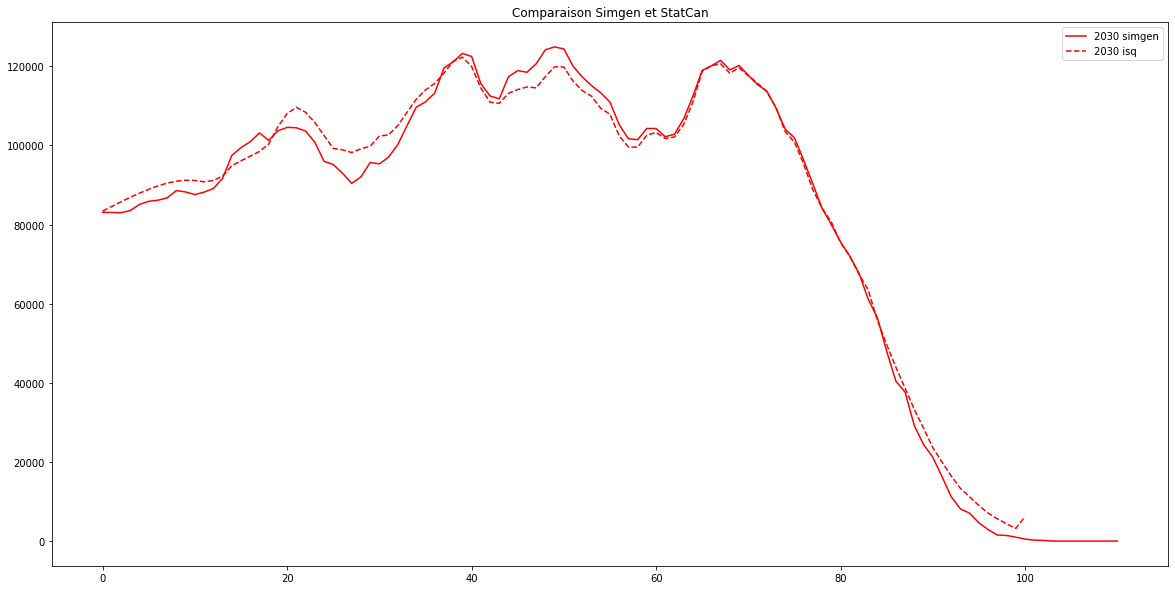

In [99]:
plt.figure(figsize=(20,10))
#plt.plot(baset[[2019]],label='2019 simgen', color='blue')
#plt.plot(popisq.loc[2019],label='2019 isq',color='blue',linestyle='dashed')
plt.plot(baset[[2030]],label='2030 simgen', color='red')
plt.plot(popisq.loc[2030],label='2030 isq', color='red', linestyle='dashed')
#plt.plot(baset[[2040]],label='2040 simgem',color='green')
#plt.plot(popisq.loc[2040],label='2040 isq', color='green', linestyle='dashed')
plt.title('Comparaison Simgen et StatCan')
plt.legend()
plt.show()